# Word Clouds
Here we will visualize how the flavor text of cards differ by color and card type, visualized with word clouds.

We use the following package to create word clouds https://github.com/amueller/word_cloud

In [1]:
import datetime
import os
import requests,time 
import numpy as np
import pandas as pd
import CF_standard_functions as cf

First we load the data. Here this is done with a wrapper function. To see how it works, check out **Color_from_Flavor.ipynb** or the source code in **CF_standard_functions.py**

In [2]:
df = cf.data_from_scryfall()
df = cf.parse_monocolor_cards(df)
df.reset_index(drop=True,inplace=True)
df.head()
print(f"{df.shape[0]} monocolor cards with distinct flavor text")

Download complete!
20567 cards with unique flavor text in data set
15890 monocolor cards with distinct flavor text


### Word cloud of all flavor text
Following this tutorial: https://www.datacamp.com/tutorial/wordcloud-python

Note that when running this on Windows (as I am) you will need to specify a path to a font when generating the WordCloud object. Do so with the _font_path_ parameter. I am using basic Calibri here.

In [104]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib
from matplotlib import pyplot as plt
from PIL import Image

matplotlib.rcParams['figure.figsize'] = [5, 3]

First, clean up the flavor text by removing all special characters. This uses a custom function, which is a wrapper for some regular expression parsing and replacement.

_(This isn't a perfect way to preprocess, as some flavor text has weird formatting.)_

In [105]:
df['flavor_text_clean']=df.flavor_text.apply(lambda x: cf.remove_special_characters(x))

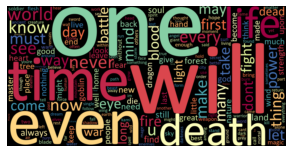

In [106]:
# ALL text of all cards!
stopwords = set(STOPWORDS) # Words to ignore
wordcloud = WordCloud(font_path='C:/Windows/Fonts/calibri.ttf',
                      stopwords=stopwords,
                      width = 1600, height = 800,
                      colormap='Spectral',background_color='black')
text_all = df.flavor_text_clean.str.cat(sep=' ')
wordcloud.generate(text_all)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

You can see that the words "one", "will", and "even" are very common. We will add these to our stopwords to filter them out from future plots.

In [107]:
stopwords = stopwords.union({'will','even','one'})
wordcloud.stopwords = stopwords

## Word Clouds by Color 

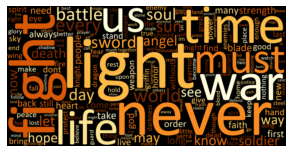

In [113]:
# White
white_text = df.flavor_text_clean[df.colors == 'W'].str.cat(sep=' ')
wordcloud.generate(white_text)
wordcloud.recolor(colormap = 'YlOrBr')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

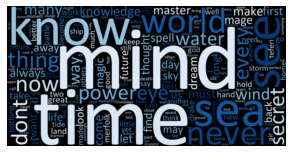

In [114]:
# Blue
blue_text = df.flavor_text_clean[df.colors == 'U'].str.cat(sep=' ')
wordcloud.generate(blue_text)
wordcloud.recolor(colormap='Blues')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

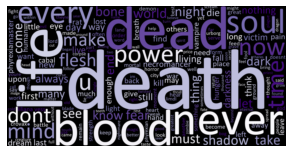

In [115]:
# Separated by colors: 
# Black
black_text = df.flavor_text_clean[df.colors == 'B'].str.cat(sep=' ')
wordcloud.background_color = 'black'
wordcloud.generate(black_text).recolor(colormap = 'Purples')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

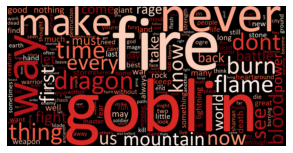

In [116]:
# Red
red_text = df.flavor_text_clean[df.colors == 'R'].str.cat(sep=' ')
wordcloud.generate(red_text)
wordcloud.recolor(colormap='Reds')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

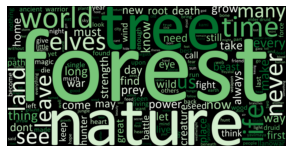

In [117]:
# Green
green_text = df.flavor_text_clean[df.colors == 'G'].str.cat(sep=' ')
wordcloud.generate(green_text)
wordcloud.recolor(colormap = 'Greens')
wordcloud.background_color = 'black'
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()